### Fetal Health Classifier for CTG Results 

In [6]:
library(repr)
library(tidyr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
install.packages("kknn")
library(kknn)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ dplyr   1.1.1
✔ tibble  3.2.1     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
✔ purrr   1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ rec

### Introduction

Clinical Cardiotocography(CTG) is a common assessment method of fetal wellbeing during pregnancy through identifying problems such as hypoxia and distress(Ali Kadhim, N. J., & Kadhim Abed, J.,2020). It classfies fetal health into three groups: normal, suspect and Pathological. 

Previous studies by Ayres‐de‐Campos, D.et al. has proven SisPorto, a program used to analyze CTG to be promising at predicting fetal health as its predictions highly matches those made by experts(2000). There has been attempts to improve the use of CTG. In 2020, Ali & Kadhim developed a classifier using firefly alogorith and naive bayesian classfier with achieved accuracy 86.55% for CTG results. 

For this project, we are interested in replicating the idea of Ali & Kadhim, but with K-nearest-neighbor classification. We obtained a dataset of CTG records from Ayres‐de‐Campos et al.'s study,which was organized and published on Kaggle(Larxel, 2020). We choose to use all column as predictors except for ones involved in histograms, which we are uncertain of what they refer to. 

We are aiming to find the best K and building a classifier with KNN model. After analyze our results, we hope to come up with ideas to improve future CTG classifiers. 



## Methods(to be filled)


Using the packages we require, we started by loading and reading our fetal health data set from Kaggle. We then cleaned up our data set by converting fetal_health (what we will be predicting) to a factor type by using the as_factor function. Since there were a lot of values in the data set, we chose to compare the means of the values of each column, and decided the values that were most different from each other to be the predictors for our classification. Therefore, we chose to use the values from columns baseline_value to mean_value_of_long_term_variability. Also to note, we decided to filter out the histogram columns because of the lack of information and uncertainty to what they represent in the fetal data set. Afterwards, we counted the number of each type of observations in the fetal_health column. However, we noticed that the first category in the fetal_health column has a much greater count compared to the other two categories, therefore, we randomly deleted some observation so that the proportion of categories in the final data set will be equal, thus can give a more accurate classification. 

Now that the data is cleaned up and all groups are equal, we then split the data into a training and testing set by first using the initial_split function from the tidymodels package. This function will split the data and ensures that the estimated accuracy will be reasonable. In the initial_split function, we also specified that prop = 0.75, meaning that 75% of the original data set will be the training set, and strata = fetal_heath to ensure that the training and testing sets will have the right proportions of each category of observations. Afterwards, training and testing functions were used to make 2 separate data frames, one for training and one for testing. 

### Obtain the Data

In [7]:
fetal_health_data <- read_csv("https://raw.githubusercontent.com/wonha0620/dsci_100_proj/main/fetal_health.csv")
head(fetal_health_data)

Rows: 2126 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): baseline value, accelerations, fetal_movement, uterine_contraction...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,⋯,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
120,0.000,0,0.000,0.000,0,0.000,73,0.5,43,⋯,62,126,2,0,120,137,121,73,1,2
132,0.006,0,0.006,0.003,0,0.000,17,2.1,0,⋯,68,198,6,1,141,136,140,12,0,1
133,0.003,0,0.008,0.003,0,0.000,16,2.1,0,⋯,68,198,5,1,141,135,138,13,0,1
134,0.003,0,0.008,0.003,0,0.000,16,2.4,0,⋯,53,170,11,0,137,134,137,13,1,1
132,0.007,0,0.008,0.000,0,0.000,16,2.4,0,⋯,53,170,9,0,137,136,138,11,1,1
134,0.001,0,0.010,0.009,0,0.002,26,5.9,0,⋯,50,200,5,3,76,107,107,170,0,3


### Wrangling the Data

In [8]:
health_data_clean <- fetal_health_data |>
    mutate(fetal_health = as_factor(fetal_health))

colnames(health_data_clean) <- gsub(" ", "_", colnames(health_data_clean))
head(health_data_clean)

baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,⋯,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
120,0.000,0,0.000,0.000,0,0.000,73,0.5,43,⋯,62,126,2,0,120,137,121,73,1,2
132,0.006,0,0.006,0.003,0,0.000,17,2.1,0,⋯,68,198,6,1,141,136,140,12,0,1
133,0.003,0,0.008,0.003,0,0.000,16,2.1,0,⋯,68,198,5,1,141,135,138,13,0,1
134,0.003,0,0.008,0.003,0,0.000,16,2.4,0,⋯,53,170,11,0,137,134,137,13,1,1
132,0.007,0,0.008,0.000,0,0.000,16,2.4,0,⋯,53,170,9,0,137,136,138,11,1,1
134,0.001,0,0.010,0.009,0,0.002,26,5.9,0,⋯,50,200,5,3,76,107,107,170,0,3


### Preliminary exploratory data analysis

In [10]:
#To determine which predictors we choose:
mean_table <- health_data_clean |>
group_by(fetal_health) |>
summarize_all(mean)
options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)
mean_table

fetal_health,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,131.9819,0.0039921450,0.007963142,0.004780665,0.0019413897,6.042296e-07,5.135952e-05,42.46586,1.4306344,5.044713,8.705498,73.40000,91.08580,164.4858,4.163142,0.3353474,138.2586,135.1021,138.4598,17.479758,0.34199396
2,141.6847,0.0002745763,0.008332203,0.002389831,0.0005355932,0.000000e+00,9.491525e-05,61.90169,0.6389831,29.030508,8.026102,49.15932,113.29492,162.4542,3.311864,0.2440678,146.5559,144.7593,147.0712,7.213559,0.43389831
3,131.6875,0.0003920455,0.025676136,0.003784091,0.0036704545,3.409091e-05,1.272727e-03,64.53977,1.5755682,22.846591,3.588636,78.34659,83.98295,162.3295,4.443182,0.3465909,114.6080,112.9773,119.5625,50.732955,-0.07386364


We compared the means calculated within each variable and choose the variable as a predictor if the means are obviously different from each other. A different mean represents that category's unique trait and is useful to classify new observations accordingly. In the end we choose all the variables from baseline_value to mean_value_of_long_term_variability. Also, the histogram columns has missing information on what the histograms are calculating from the original data set, due to this uncertainty, we choose not to incorporate them as our predictors.  

In [11]:
#So we keep the predictor columns:
health_data_chosen <- health_data_clean |>
select(baseline_value:mean_value_of_long_term_variability,fetal_health)
head(health_data_chosen)

baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
120,0.000,0,0.000,0.000,0,0.000,73,0.5,43,2.4,2
132,0.006,0,0.006,0.003,0,0.000,17,2.1,0,10.4,1
133,0.003,0,0.008,0.003,0,0.000,16,2.1,0,13.4,1
134,0.003,0,0.008,0.003,0,0.000,16,2.4,0,23.0,1
132,0.007,0,0.008,0.000,0,0.000,16,2.4,0,19.9,1
134,0.001,0,0.010,0.009,0,0.002,26,5.9,0,0.0,3


In [12]:
#count each category in fetal_health to see if the proportion needs to be adjusted
count_fetal_health <- health_data_chosen |>
group_by(fetal_health) |>
summarise(count = n())
count_fetal_health

fetal_health,count
<fct>,<int>
1,1655
2,295
3,176


The differences between each class is significant (with class 1 occupying 78% of the total data). If we we choose to stick with the original number of data, category 2 and 3 would be of really small significant, potentially resulting in less accurate predictions. To address this problem, we randomly deleted some observations in class 1 and class 2. Making each class having 176 observations, so they are equal in proportion . 

In [13]:
#To randomly delete some data, we use set.seed and sample_n
set.seed(2023)
sampled_health_data1 <- health_data_chosen |>
filter(fetal_health == 1) |>
sample_n(176)

sampled_health_data2 <- health_data_chosen |>
filter(fetal_health == 2) |>
sample_n(176)

In [26]:
#Combine the selected data in category 1 and 2 with 3.
final_sampled_data <- health_data_chosen |>
filter(fetal_health == 3) |>
bind_rows(sampled_health_data1,sampled_health_data2)

head(final_sampled_data)

baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
134,0.001,0.00,0.010,0.009,0,0.002,26,5.9,0,0.0,3
134,0.001,0.00,0.013,0.008,0,0.003,29,6.3,0,0.0,3
122,0.000,0.00,0.000,0.000,0,0.000,83,0.5,6,15.6,3
122,0.000,0.00,0.002,0.000,0,0.000,84,0.5,5,13.6,3
122,0.000,0.00,0.003,0.000,0,0.000,86,0.3,6,10.6,3
129,0.000,0.34,0.004,0.002,0,0.003,30,2.1,0,8.5,3


We could double check if we get the wanted quantity of the observations in final_sampled_data

In [15]:
count_final_sampled_data <- final_sampled_data |> 
group_by(fetal_health) |>
summarise(count = n())
count_final_sampled_data

fetal_health,count
<fct>,<int>
1,176
2,176
3,176


### Developing the Model and Visualization of the dataset 

In [16]:
#First we split the whole dataset into training and testing datasets.
set.seed(2023)
health_split <- initial_split(final_sampled_data, prop = 0.75, strata = fetal_health)
health_training <- training(health_split)
health_testing <- testing(health_split)

#### Choosing the best K

In [17]:
set.seed(2023)
#Then, we split the training data into multiple folds of training and validation by vfold_cv. We choose to 
#split into 5 folds as it's commonly used.
health_vfold <- vfold_cv(health_training,v = 5, strata = fetal_health)

#Then we need to write our recipe based on the training data
health_recipe <- recipe(fetal_health ~., data = health_training)|>
step_scale(all_predictors())|>
step_center(all_predictors())

#We use knn classification as we chose,  and tune() to test the different k.
health_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")

In [18]:
#We need a tibble to include the k values we want to try and fit. We choose from 1 to 50 and by 3 because 
#after trying from 1 to 100 and going by 5, we found the peak in the graph to be at the start, so narrowing the
#span of k could result in a better visualization.
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 3))
               
#Then we use tune_grid to fit the model with different k.
health_results <- workflow() |>
    add_recipe(health_recipe) |>
    add_model(health_spec_tune) |>
    tune_grid(resamples = health_vfold, grid = k_vals) |>
    collect_metrics()

#Then we calculate the accuracies from the results
accuracies <- health_results |>
    filter(.metric == "accuracy")
head(accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.8665717,5,0.012400346,Preprocessor1_Model01
4,accuracy,multiclass,0.8683761,5,0.012513830,Preprocessor1_Model02
7,accuracy,multiclass,0.8432099,5,0.009471000,Preprocessor1_Model03
10,accuracy,multiclass,0.8459639,5,0.015594948,Preprocessor1_Model04
13,accuracy,multiclass,0.8281102,5,0.009952272,Preprocessor1_Model05
16,accuracy,multiclass,0.8206078,5,0.008579131,Preprocessor1_Model06


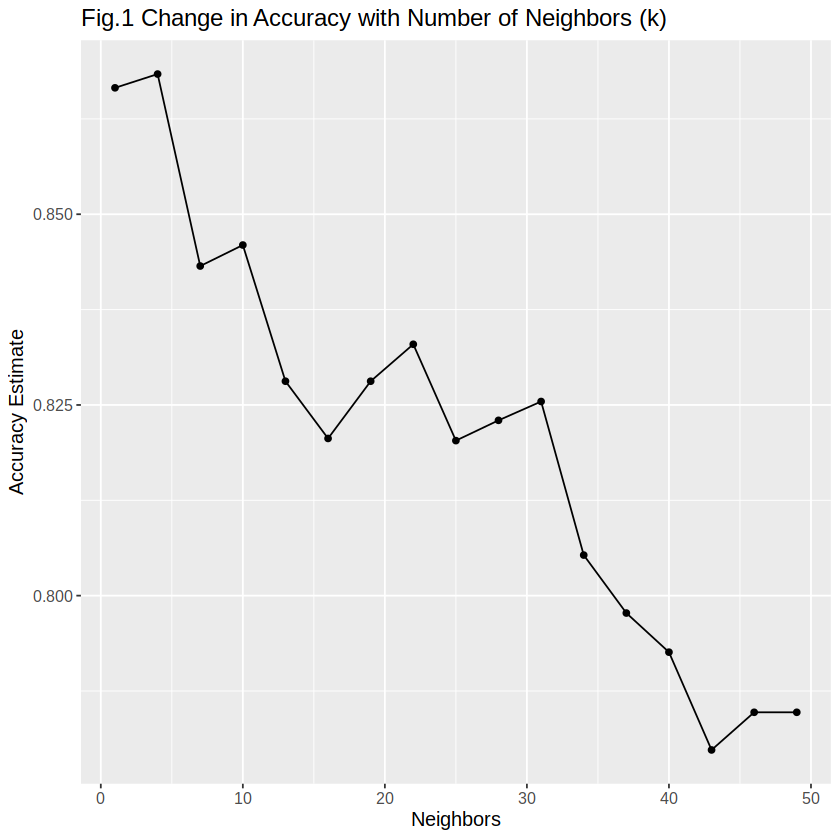

In [19]:
#then we plot the k vs accuracy and choose the k with highest accuracy
options(rept.plot.width = 4, rept.plot.height = 4)
acc_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  ggtitle("Fig.1 Change in Accuracy with Number of Neighbors (k)")+
  theme(text = element_text(size = 12))

acc_vs_k

So at K = 4, we get the highest accuracy. 

#### Prediction using the chosen K

In [20]:
#Final model with K = 4
health_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
    set_engine("kknn") |>
    set_mode("classification")

#Reuse recipe and fit
health_fit_final <- workflow() |>
    add_recipe(health_recipe) |>
    add_model(health_spec_final) |>
    fit(health_training)

health_predictions <- predict(health_fit_final, health_testing) |>
    bind_cols(health_testing)

#Check accuracy of our model
health_predictions_accuracy <- health_predictions |>
    metrics(truth = fetal_health, estimate = .pred_class)
health_predictions_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8030303
kap,multiclass,0.7045455


Our model seems to be able to predict accurately 80% of the time. We do deeper analysis by creating bar graphs

#### Visualization and Analysis

`summarise()` has grouped output by 'correct'. You can override using the
`.groups` argument.


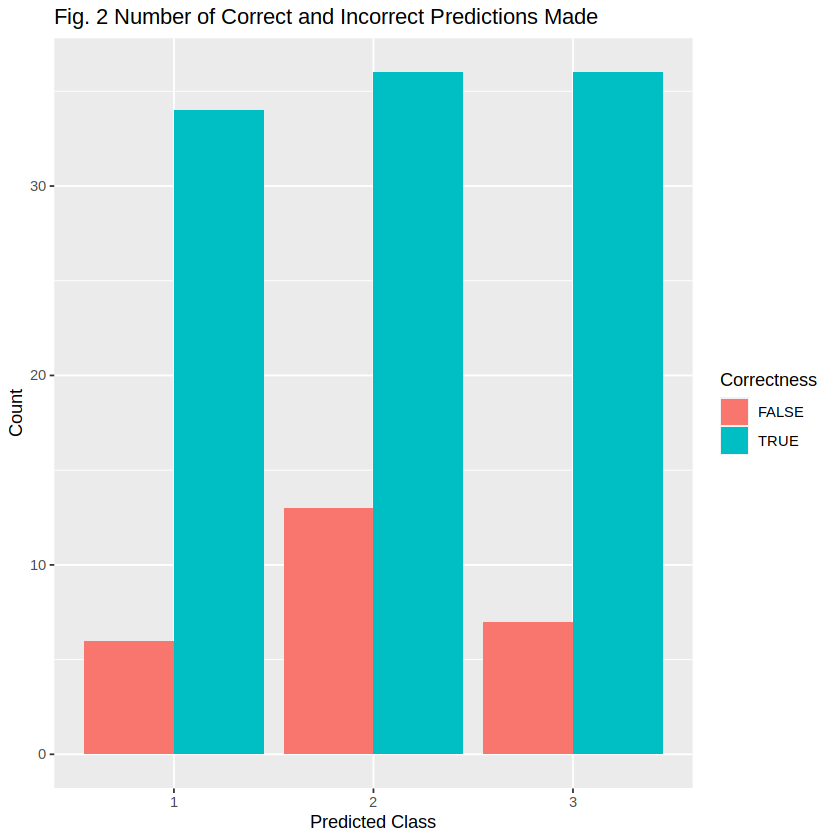

In [25]:
#We create the dataframe with predicted results, count the ones that are correctly predicted
health_predictions_clean <- health_predictions |>
    select(.pred_class, fetal_health) |>
    mutate(correct = (.pred_class == fetal_health)) |>
    group_by(correct, .pred_class) |>
    summarize(count = n())

#We use bar graph to visualize the correct and incorrect predictions.
health_predictions_plot <- health_predictions_clean |>
ggplot(aes(x = .pred_class, y = count, fill = correct)) +
geom_bar(stat = "identity", position = "dodge") +
labs(x = "Predicted Class", y = "Count", fill = "Correctness") +
ggtitle("Fig. 2 Number of Correct and Incorrect Predictions Made") 

health_predictions_plot

### Discussion

1: healthy (lowest number wrongly predictors)
2: suspect
3: infected

Column 1 is must important in our analysis as it is identifying whether or not the fetal is healthy.
But should not over-predict fetal as "healthy". Column 3 is also significant as it is also identifying if the fetal as unhealthy. 

positive: healthy
false positive: predicted healthy, but was not (is rated low on our graph, want to minimize this)
false negative: unhealthy 


Our model has an 80% accuracy which is not generally good in classifying a patient is healthy and unhealthy in the healthcare system. 

Since our model only has an 80% accuracy, it would be better to have more values that will help increase the accuracy of our model. Through our research, a fetals' health would be dependent on the mother's health. Therefore, adding more values on the mother's health, like the mother's heath, whether the mother has a disease, mother's heart beat, etc would be a likely factor that would increase the accuracy of our model. 

Although our model has an 80% accuracy, which tells us a general idea of how trustworthy the model is. However, there is a chance that there would be a misidentifying whether or not the fetal is healthy or not healthy. This could be a possible problem if the fetal were to be misidentified as unhealthy and were to receive treatment that it did not need. 

Should double-check. 

maximize column 1


We found that when using knn classifier to predict fetal health, K=4 would give us the best accuracy, which is 80%. 

In this data, 1 means health, 2 means suspect and 3 means pathological. If the result is 2 or 3, it would raise awareness and we need to perform a retest or other more detailed tests to determine fetal health. But if the result is 1, we would think the fetal is healthy without further tests. However, a problem underlying this is that 80% is not accurate enough in a health care system. We want to maximize accuracy for the model to be trustable in general, but more importantly, we need to minimize false positive predictions.  

If we determine the condition of 1 as the positive condition, 2 and 3 as negative conditions. False positive would mean the classifier predicted healthy when the fetal is actually a suspect or pathological. False negative would mean we predicted the fetal is suspect or pathological when it is healthy. 

In our case, false positive could be more serious than false negative. Because the fetal could miss the best time for diagnosis and treatment if wrongly predicted as healthy, potentially having a higher chance to mortality. But if it is false negative, and we ran more test to see the fetal is actually healthy, there is the cost of time and monetary investment to the extra tests. Based on these reasons, we want the model to be cautious and not over-predict positive results and minimize false positive predictions.

The result is similar to what we expected as most predictions were correct. But we were expecting a higher accuracy. But it shows that knn could be used to generate a classifier for this fetal health data. The developing of such classifiers could contribute to analyzing CTG results. We expect the classifier would help to raise awareness to fetal health conditions, so timely treatment can take action, reducing fetal and maternal mortality. 

Future questions involve how do we increase the accuracy of this model. One way this could be achieved is by adding more predictors. On the CTG machine, it also displays the mother's heart rate(Eliran, 2023). Including the change of mother's heart rate as a predictor could potentially increase accuracy. Future programs could consider combining the CTG results with test results done during the Prenatal Visits to predict fetal and maternal health together. Tests such as Ultrasound, Chorionic villus sampling (CVS) that checks chromosomal abnormality etc. could be used(Nguyen, T. P.,2022).

### References

Ali Kadhim, N. J., & Kadhim Abed, J. (2020). Enhancing the prediction accuracy for cardiotocography (CTG) using firefly algorithm and naive bayesian classifier. IOP Conference Series. Materials Science and Engineering, 745(1), 12101. https://doi.org/10.1088/1757-899X/745/1/012101

Ayres‐de‐Campos, D., Bernardes, J., Garrido, A., Marques‐de‐Sá, J., & Pereira‐Leite, L. (2000). Sisporto 2.0: A program for automated analysis of cardiotocograms. The Journal of Maternal-Fetal Medicine, 9(5), 311-318. https://doi.org/10.1002/1520-6661(200009/10)9:5<311::AID-MFM12>3.0.CO;2-9

Nguyen, T. P. (Ed.). (2022, July). Prenatal tests: First trimester (for parents) - nemours kidshealth. KidsHealth. https://kidshealth.org/en/parents/tests-first-trimester.html 

Eliran, T. (2023, November 21). Cardiotocography. Wikipedia. https://en.wikipedia.org/wiki/Cardiotocography#cite_note-alfirevic2017-7 

Larxel, L. (2020, October 12). Fetal Health Classification. Kaggle. https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification 